# Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/final_data.csv')
df

,city,bd,gender,registered_via,is_churn,payment_plan_sum,plan_list_price,actual_amount_paid,discount_rate,is_auto_renew,is_cancel,transaction_count,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,registration_duration,listening_duration
0,4,30,1,9,0,603,2980,3129,0.000000,1.00,0.000000,21,77,22,16,44,658,287,171508.646,2070,781
1,5,34,1,9,1,360,1072,1072,0.000000,0.00,0.000000,2,145,84,58,42,1678,1158,448313.054,2168,220
2,13,63,1,9,0,783,3874,4023,0.000000,1.00,0.000000,27,1173,390,246,308,5003,5784,1435958.164,2047,817
3,4,28,0,9,0,270,1589,1738,0.000000,0.90,0.100000,10,81,20,12,16,438,343,107171.103,2021,761
4,22,38,0,9,0,784,3874,4023,0.000000,1.00,0.000000,27,711,528,246,218,1129,2593,419622.336,2020,818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356272,10,27,1,9,0,390,1937,1937,0.000000,1.00,0.000000,13,2265,462,312,298,15127,15472,3923982.034,577,535
356273,4,31,1,4,0,390,1937,1937,0.000000,1.00,0.000000,13,290,95,45,29,2500,2659,668510.530,580,531
356274,5,21,0,9,0,490,2189,2189,0.000000,0.25,0.000000,12,1758,473,293,278,6635,5013,1780429.233,545,529
356275,5,22,1,7,0,540,1782,1782,0.000000,1.00,0.000000,18,953,178,74,164,7081,7023,1865451.074,548,527


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356277 entries, 0 to 356276
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   city                   356277 non-null  int64  
 1   bd                     356277 non-null  int64  
 2   gender                 356277 non-null  int64  
 3   registered_via         356277 non-null  int64  
 4   is_churn               356277 non-null  int64  
 5   payment_plan_sum       356277 non-null  int64  
 6   plan_list_price        356277 non-null  int64  
 7   actual_amount_paid     356277 non-null  int64  
 8   discount_rate          356277 non-null  float64
 9   is_auto_renew          356277 non-null  float64
 10  is_cancel              356277 non-null  float64
 11  transaction_count      356277 non-null  int64  
 12  num_25                 356277 non-null  int64  
 13  num_50                 356277 non-null  int64  
 14  num_75                 356277 non-nu

In [5]:
df.columns

Index(['city', 'bd', 'gender', 'registered_via', 'is_churn',
       'payment_plan_sum', 'plan_list_price', 'actual_amount_paid',
       'discount_rate', 'is_auto_renew', 'is_cancel', 'transaction_count',
       'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq',
       'total_secs', 'registration_duration', 'listening_duration'],
      dtype='object')

## Correlation

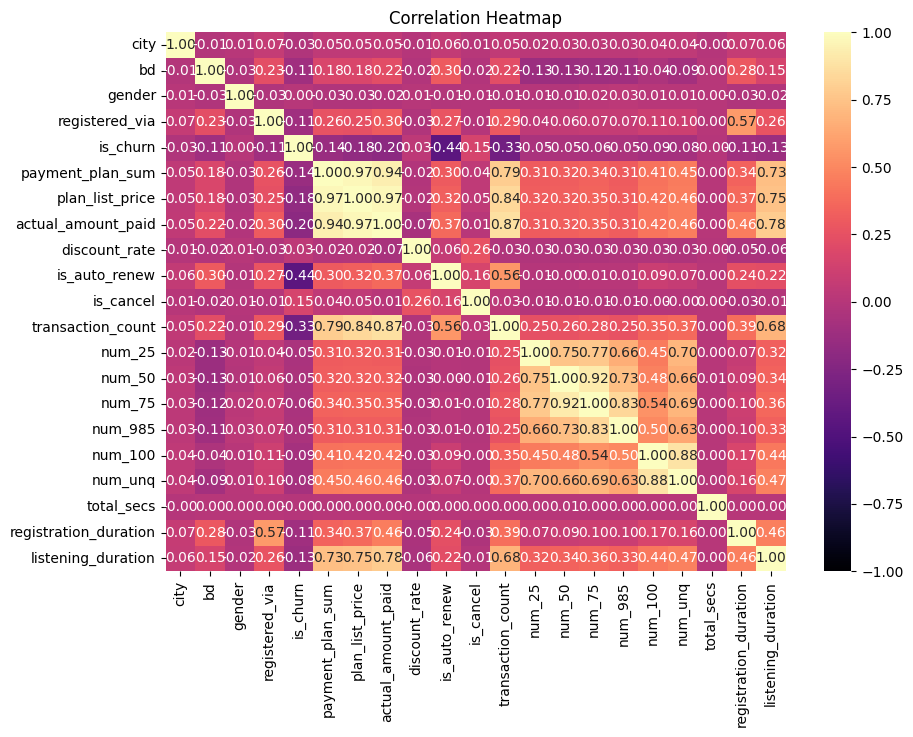

In [6]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [7]:
print(corr_matrix)

                           city  ...  listening_duration
city                   1.000000  ...            0.062744
bd                    -0.013063  ...            0.149340
gender                 0.009804  ...           -0.021254
registered_via         0.067599  ...            0.260359
is_churn              -0.025750  ...           -0.132015
payment_plan_sum       0.045360  ...            0.730283
plan_list_price        0.046043  ...            0.749732
actual_amount_paid     0.053369  ...            0.781584
discount_rate         -0.005693  ...           -0.056087
is_auto_renew          0.058377  ...            0.221825
is_cancel              0.006623  ...           -0.012707
transaction_count      0.049991  ...            0.683677
num_25                 0.021731  ...            0.322573
num_50                 0.034351  ...            0.337660
num_75                 0.030802  ...            0.362748
num_985                0.029739  ...            0.331986
num_100                0.039196

## Model Train - 사용할 컬럼

**Features**
- 'is_churn' 뺴고 다

**label**
- 'is_churn'



In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# 평가 함수 정의
def evaluate_model(y_test, y_pred, model_name="Model"):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"📌 {model_name} 성능 평가:")
    print(f"Accuracy  : {accuracy:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall    : {recall:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"AUC Score : {auc:.4f}")
    
    # Confusion Matrix 출력
    print(f"Confusion Matrix:\n{cm}")
    print("-" * 40)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('is_churn', axis=1)
y = df['is_churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)

# train
xgb_model.fit(X_train_scaled, y_train, eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)], verbose=True)

xgb_y_pred = xgb_model.predict(X_test_scaled)

[0]	validation_0-logloss:0.38510	validation_1-logloss:0.38836
[1]	validation_0-logloss:0.34531	validation_1-logloss:0.34828
[2]	validation_0-logloss:0.32086	validation_1-logloss:0.32366
[3]	validation_0-logloss:0.30387	validation_1-logloss:0.30656
[4]	validation_0-logloss:0.29353	validation_1-logloss:0.29661
[5]	validation_0-logloss:0.28621	validation_1-logloss:0.28947
[6]	validation_0-logloss:0.28134	validation_1-logloss:0.28473
[7]	validation_0-logloss:0.27783	validation_1-logloss:0.28137
[8]	validation_0-logloss:0.27522	validation_1-logloss:0.27901
[9]	validation_0-logloss:0.27299	validation_1-logloss:0.27692
[10]	validation_0-logloss:0.27092	validation_1-logloss:0.27509
[11]	validation_0-logloss:0.26964	validation_1-logloss:0.27421
[12]	validation_0-logloss:0.26804	validation_1-logloss:0.27286
[13]	validation_0-logloss:0.26725	validation_1-logloss:0.27224
[14]	validation_0-logloss:0.26643	validation_1-logloss:0.27152
[15]	validation_0-logloss:0.26568	validation_1-logloss:0.27106
[1

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier

# 최적의 파라미터 찾기 - GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

stratified_kfold = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(
    estimator=XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42, tree_method="gpu_hist"),
    param_grid=param_grid,
    scoring='f1',
    cv=stratified_kfold,
    verbose=1,
    n_jobs=-1
)

# GridSearchCV 실행
grid_search.fit(X_train_scaled, y_train, eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)], verbose=True)

# 최적의 파라미터 출력
print(f"🏆 최적의 하이퍼파라미터: {grid_search.best_params_}")

best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test_scaled)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[0]	validation_0-logloss:0.40696	validation_1-logloss:0.41056
[1]	validation_0-logloss:0.37021	validation_1-logloss:0.37357


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:46:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[2]	validation_0-logloss:0.34510	validation_1-logloss:0.34848
[3]	validation_0-logloss:0.32664	validation_1-logloss:0.33014
[4]	validation_0-logloss:0.31298	validation_1-logloss:0.31675
[5]	validation_0-logloss:0.30232	validation_1-logloss:0.30632
[6]	validation_0-logloss:0.29348	validation_1-logloss:0.29771
[7]	validation_0-logloss:0.28714	validation_1-logloss:0.29167
[8]	validation_0-logloss:0.28205	validation_1-logloss:0.28673
[9]	validation_0-logloss:0.27807	validation_1-logloss:0.28295
[10]	validation_0-logloss:0.27491	validation_1-logloss:0.27998
[11]	validation_0-logloss:0.27256	validation_1-logloss:0.27783
[12]	validation_0-logloss:0.27053	validation_1-logloss:0.27598
[13]	validation_0-logloss:0.26880	validation_1-logloss:0.27451
[14]	validation_0-logloss:0.26715	validation_1-logloss:0.27323
[15]	validation_0-logloss:0.26599	validation_1-logloss:0.27239
[16]	validation_0-logloss:0.26488	validation_1-logloss:0.27158
[17]	validation_0-logloss:0.26377	validation_1-logloss:0.27081


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:46:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:46:31] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


# min_child_weight 파라미터 추가 전

**성능**

In [ ]:
evaluate_model(y_test, xgb_y_pred, "XGBoost 기본 모델")
evaluate_model(y_test, y_pred_best, "XGBoost 최적의 파라미터 모델")

📌 XGBoost 기본 모델 성능 평가:
Accuracy  : 0.8869
Precision : 0.7353
Recall    : 0.5702
F1 Score  : 0.6423
AUC Score : 0.7629
Confusion Matrix:
[[55966  2604]
 [ 5452  7234]]
----------------------------------------
📌 XGBoost 최적의 파라미터 모델 성능 평가:
Accuracy  : 0.8879
Precision : 0.7338
Recall    : 0.5813
F1 Score  : 0.6487
AUC Score : 0.7678
Confusion Matrix:
[[55895  2675]
 [ 5312  7374]]
----------------------------------------


**Overfitting 여부**

Train 성능 vs Validation 성능

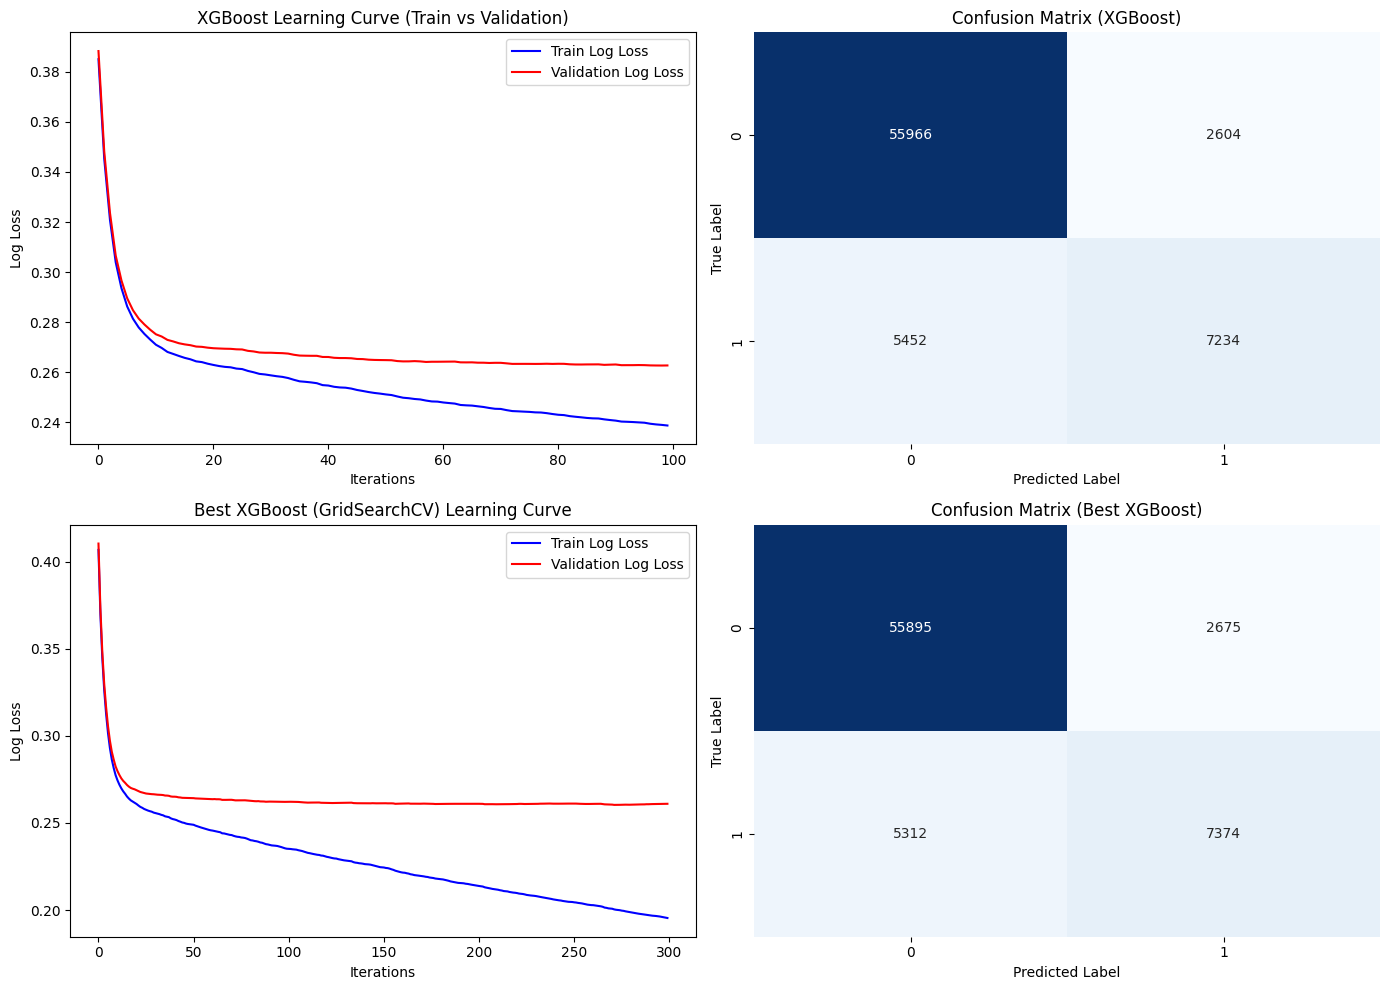

In [22]:
# XGBoost 모델의 학습 결과 가져오기
results_xgb = xgb_model.evals_result()
results_best_xgb = best_xgb.evals_result()

# Confusion Matrix 계산
cm_xgb = confusion_matrix(y_test, xgb_y_pred)
cm_best_xgb = confusion_matrix(y_test, y_pred_best)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 서브플롯 생성

# 첫 번째 학습 곡선 (기본 XGBoost)
axes[0, 0].plot(results_xgb['validation_0']['logloss'], label="Train Log Loss", color='blue')
axes[0, 0].plot(results_xgb['validation_1']['logloss'], label="Validation Log Loss", color='red')
axes[0, 0].set_xlabel("Iterations")
axes[0, 0].set_ylabel("Log Loss")
axes[0, 0].set_title("XGBoost Learning Curve (Train vs Validation)")
axes[0, 0].legend()

# 두 번째 학습 곡선 (GridSearchCV 최적화 XGBoost)
axes[1, 0].plot(results_best_xgb['validation_0']['logloss'], label="Train Log Loss", color='blue')
axes[1, 0].plot(results_best_xgb['validation_1']['logloss'], label="Validation Log Loss", color='red')
axes[1, 0].set_xlabel("Iterations")
axes[1, 0].set_ylabel("Log Loss")
axes[1, 0].set_title("Best XGBoost (GridSearchCV) Learning Curve")
axes[1, 0].legend()

# 첫 번째 Confusion Matrix (기본 XGBoost)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 1])
axes[0, 1].set_title("Confusion Matrix (XGBoost)")
axes[0, 1].set_xlabel("Predicted Label")
axes[0, 1].set_ylabel("True Label")

# 두 번째 Confusion Matrix (GridSearchCV 최적화 XGBoost)
sns.heatmap(cm_best_xgb, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 1])
axes[1, 1].set_title("Confusion Matrix (Best XGBoost)")
axes[1, 1].set_xlabel("Predicted Label")
axes[1, 1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

교차검증

In [20]:
from sklearn.model_selection import cross_val_score

cv_scores1 = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='f1')
print(f"(default param) Cross Validation F1 Score: {cv_scores1.mean():.4f} ± {cv_scores1.std():.4f}")

cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='f1')
print(f"(best param) Cross Validation F1 Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

(default param) Cross Validation F1 Score: 0.6294 ± 0.0039
(best param) Cross Validation F1 Score: 0.6373 ± 0.0020


결론: 표준편차가 작은 편에 속하지만, gridSearchCV가 과적합에 맞는 모델을 찾았을 가능성이 높다. 과적합이 우려된다.  
-> min_samples_weight 파라미터 추가

**AUC & ROC Curve**

- 파란색 -- 선: 기본 모델의 ROC 곡선
- 빨간색 - 선: 최적화된 모델의 ROC 곡선
- 회색 -- 선: 랜덤 분류기 (AUC=0.5) 기준선

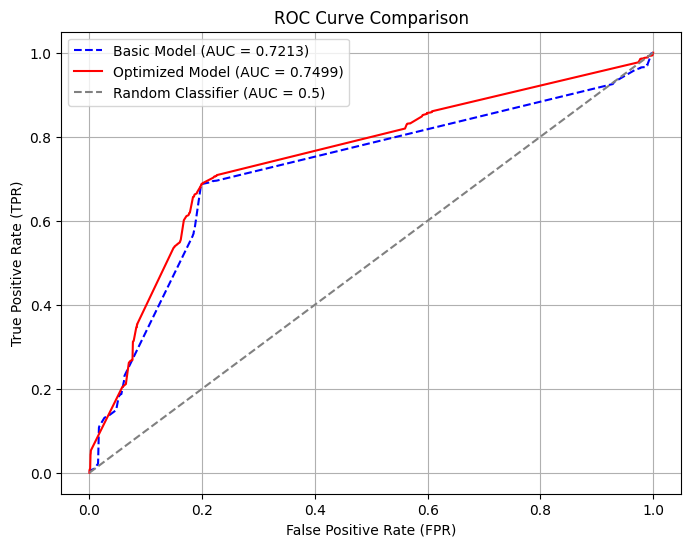

In [15]:
from sklearn.metrics import roc_curve, auc

# ROC 곡선 데이터 계산
y_probs_basic = xgb_model.predict_proba(X_test)[:, 1]  # 기본 모델 확률 예측값
y_probs_best = best_xgb.predict_proba(X_test)[:, 1]  # 최적 모델 확률 예측값

fpr_basic, tpr_basic, _ = roc_curve(y_test, y_probs_basic)
fpr_best, tpr_best, _ = roc_curve(y_test, y_probs_best)

auc_basic = auc(fpr_basic, tpr_basic)
auc_best = auc(fpr_best, tpr_best)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr_basic, tpr_basic, linestyle='--', color='blue', label=f"Basic Model (AUC = {auc_basic:.4f})")
plt.plot(fpr_best, tpr_best, linestyle='-', color='red', label=f"Optimized Model (AUC = {auc_best:.4f})")

# 랜덤 예측 기준선
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Classifier (AUC = 0.5)")

# 그래프 설정
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

**Feature Importance**

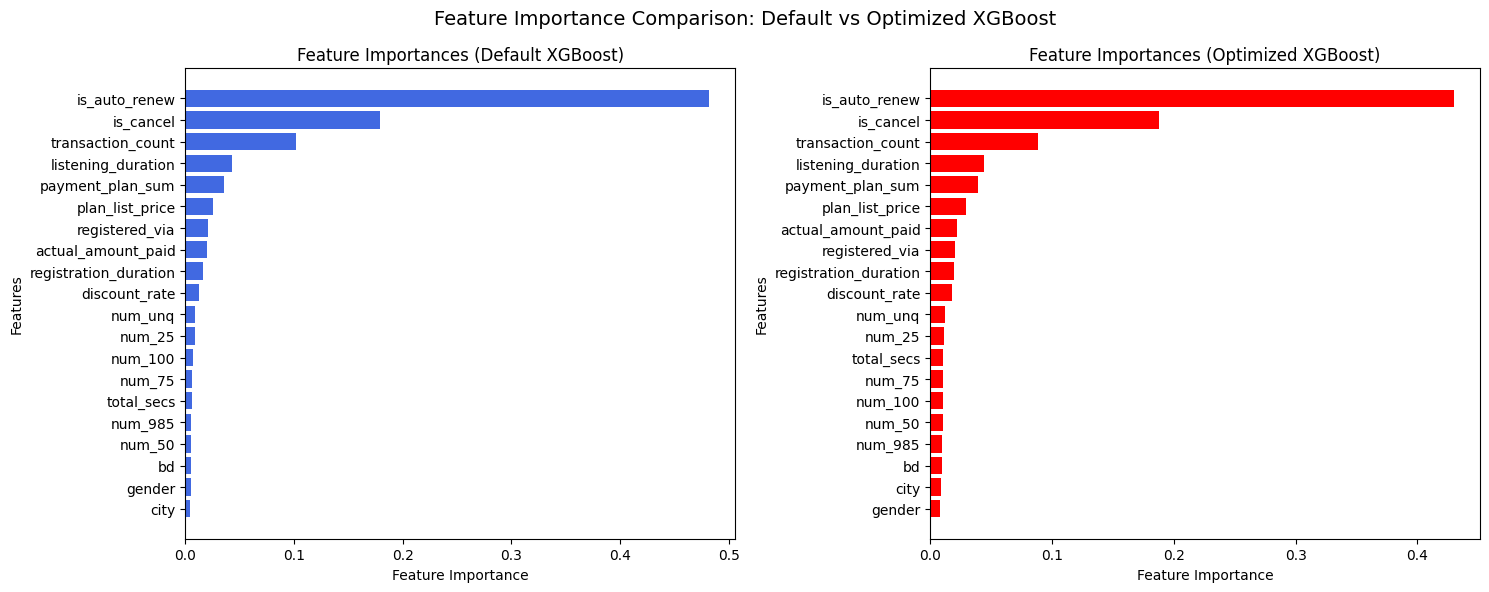

In [21]:
feature_importance_d = xgb_model.feature_importances_
feature_importance = best_xgb.feature_importances_
features = X_train.columns

sorted_idx_d = np.argsort(feature_importance_d)[::-1]
sorted_features_d = [features[i] for i in sorted_idx_d]
sorted_importance_d = feature_importance_d[sorted_idx_d]

sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [features[i] for i in sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].barh(sorted_features_d, sorted_importance_d, color='royalblue')
axes[0].set_title("Feature Importances (Default XGBoost)")
axes[0].set_xlabel("Feature Importance")
axes[0].set_ylabel("Features")
axes[0].invert_yaxis()

# 시각화
axes[1].barh(sorted_features, sorted_importance, color='red')
axes[1].set_title("Feature Importances (Optimized XGBoost)")
axes[1].set_xlabel("Feature Importance")
axes[1].set_ylabel("Features")
axes[1].invert_yaxis()

plt.suptitle("Feature Importance Comparison: Default vs Optimized XGBoost", fontsize=14)
plt.tight_layout()
plt.show()

# min_child_weight 파라미터 추가 후

**성능**

In [ ]:
evaluate_model(y_test, xgb_y_pred, "XGBoost 기본 모델")
evaluate_model(y_test, y_pred_best, "XGBoost 최적의 파라미터 모델")

📌 XGBoost 기본 모델 성능 평가:
Accuracy  : 0.8869
Precision : 0.7353
Recall    : 0.5702
F1 Score  : 0.6423
AUC Score : 0.7629
Confusion Matrix:
[[55966  2604]
 [ 5452  7234]]
----------------------------------------
📌 XGBoost 최적의 파라미터 모델 성능 평가:
Accuracy  : 0.8882
Precision : 0.7347
Recall    : 0.5822
F1 Score  : 0.6496
AUC Score : 0.7683
Confusion Matrix:
[[55903  2667]
 [ 5300  7386]]
----------------------------------------


**Overfitting 여부**

Train 성능 vs Validation 성능

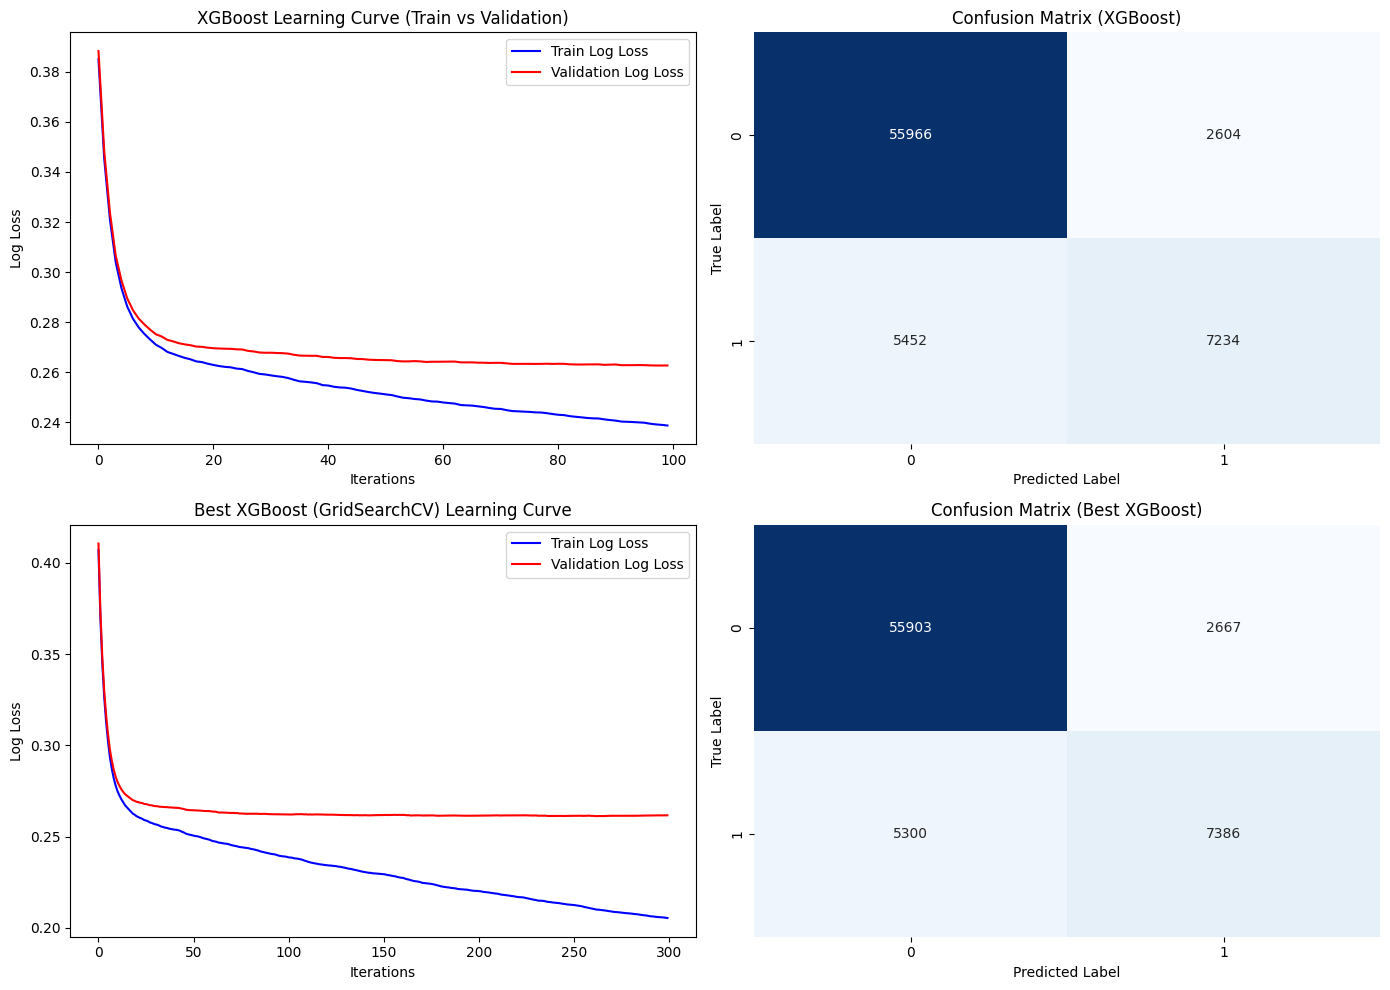

In [ ]:
# XGBoost 모델의 학습 결과 가져오기
results_xgb = xgb_model.evals_result()
results_best_xgb = best_xgb.evals_result()

# Confusion Matrix 계산
cm_xgb = confusion_matrix(y_test, xgb_y_pred)
cm_best_xgb = confusion_matrix(y_test, y_pred_best)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 서브플롯 생성

# 첫 번째 학습 곡선 (기본 XGBoost)
axes[0, 0].plot(results_xgb['validation_0']['logloss'], label="Train Log Loss", color='blue')
axes[0, 0].plot(results_xgb['validation_1']['logloss'], label="Validation Log Loss", color='red')
axes[0, 0].set_xlabel("Iterations")
axes[0, 0].set_ylabel("Log Loss")
axes[0, 0].set_title("XGBoost Learning Curve (Train vs Validation)")
axes[0, 0].legend()

# 두 번째 학습 곡선 (GridSearchCV 최적화 XGBoost)
axes[1, 0].plot(results_best_xgb['validation_0']['logloss'], label="Train Log Loss", color='blue')
axes[1, 0].plot(results_best_xgb['validation_1']['logloss'], label="Validation Log Loss", color='red')
axes[1, 0].set_xlabel("Iterations")
axes[1, 0].set_ylabel("Log Loss")
axes[1, 0].set_title("Best XGBoost (GridSearchCV) Learning Curve")
axes[1, 0].legend()

# 첫 번째 Confusion Matrix (기본 XGBoost)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 1])
axes[0, 1].set_title("Confusion Matrix (XGBoost)")
axes[0, 1].set_xlabel("Predicted Label")
axes[0, 1].set_ylabel("True Label")

# 두 번째 Confusion Matrix (GridSearchCV 최적화 XGBoost)
sns.heatmap(cm_best_xgb, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 1])
axes[1, 1].set_title("Confusion Matrix (Best XGBoost)")
axes[1, 1].set_xlabel("Predicted Label")
axes[1, 1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

교차검증

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores1 = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='f1')
print(f"(default param) Cross Validation F1 Score: {cv_scores1.mean():.4f} ± {cv_scores1.std():.4f}")

cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='f1')
print(f"(best param) Cross Validation F1 Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

(default param) Cross Validation F1 Score: 0.6294 ± 0.0039


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:47:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:47:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:47:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserW

(best param) Cross Validation F1 Score: 0.6405 ± 0.0035


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:48:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


결론: 그래도 과적합일 확률이 크다..

**AUC & ROC Curve**

- 파란색 -- 선: 기본 모델의 ROC 곡선
- 빨간색 - 선: 최적화된 모델의 ROC 곡선
- 회색 -- 선: 랜덤 분류기 (AUC=0.5) 기준선

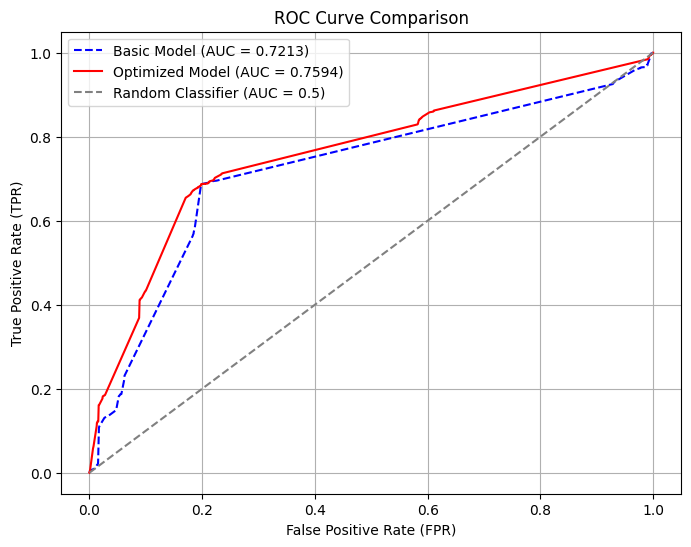

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC 곡선 데이터 계산
y_probs_basic = xgb_model.predict_proba(X_test)[:, 1]  # 기본 모델 확률 예측값
y_probs_best = best_xgb.predict_proba(X_test)[:, 1]  # 최적 모델 확률 예측값

fpr_basic, tpr_basic, _ = roc_curve(y_test, y_probs_basic)
fpr_best, tpr_best, _ = roc_curve(y_test, y_probs_best)

auc_basic = auc(fpr_basic, tpr_basic)
auc_best = auc(fpr_best, tpr_best)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr_basic, tpr_basic, linestyle='--', color='blue', label=f"Basic Model (AUC = {auc_basic:.4f})")
plt.plot(fpr_best, tpr_best, linestyle='-', color='red', label=f"Optimized Model (AUC = {auc_best:.4f})")

# 랜덤 예측 기준선
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Classifier (AUC = 0.5)")

# 그래프 설정
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

**Feature Importance**

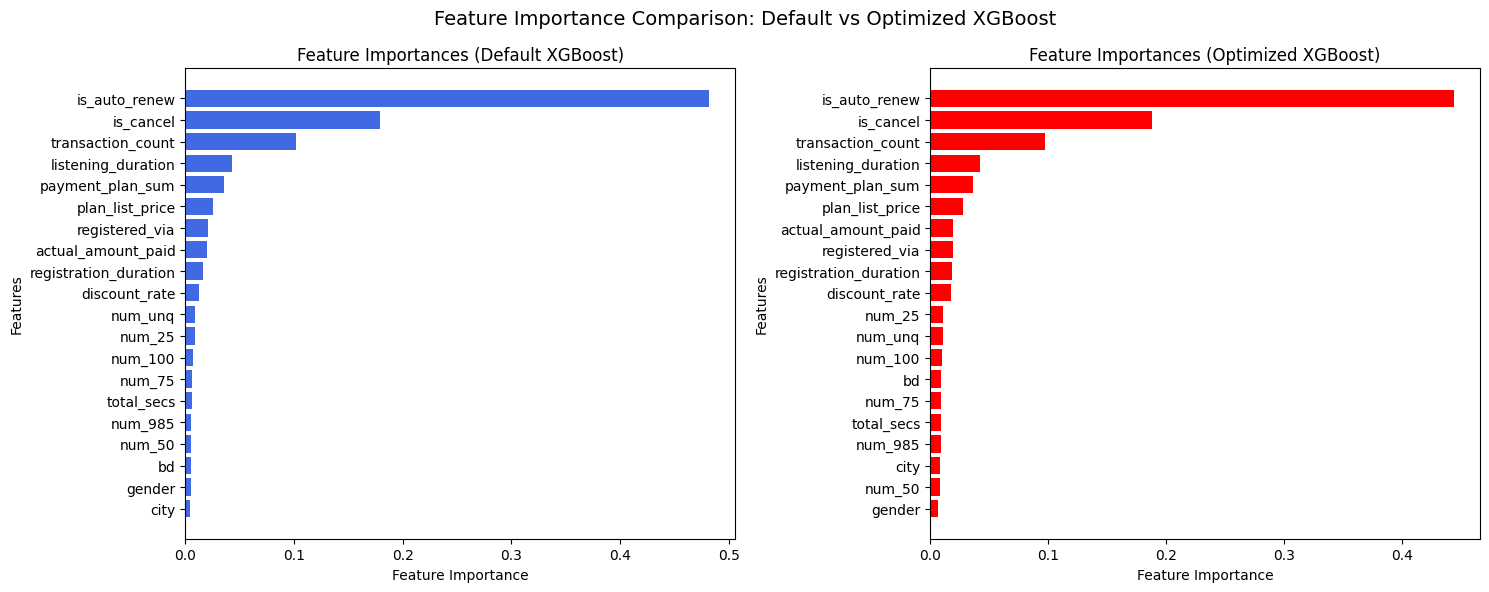

In [ ]:
feature_importance_d = xgb_model.feature_importances_
feature_importance = best_xgb.feature_importances_
features = X_train.columns

sorted_idx_d = np.argsort(feature_importance_d)[::-1]
sorted_features_d = [features[i] for i in sorted_idx_d]
sorted_importance_d = feature_importance_d[sorted_idx_d]

sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [features[i] for i in sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].barh(sorted_features_d, sorted_importance_d, color='royalblue')
axes[0].set_title("Feature Importances (Default XGBoost)")
axes[0].set_xlabel("Feature Importance")
axes[0].set_ylabel("Features")
axes[0].invert_yaxis()

# 시각화
axes[1].barh(sorted_features, sorted_importance, color='red')
axes[1].set_title("Feature Importances (Optimized XGBoost)")
axes[1].set_xlabel("Feature Importance")
axes[1].set_ylabel("Features")
axes[1].invert_yaxis()

plt.suptitle("Feature Importance Comparison: Default vs Optimized XGBoost", fontsize=14)
plt.tight_layout()
plt.show()